In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Model Selection and Fine Tunning

In [3]:
df = pd.read_pickle("/Users/mortzabari/Desktop/Mor/Academic/Data Science Course/Jupiter Notebooks/final project/CancerData_After_FeatureSelection.pkl")
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [4]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the dataset to train, dev, test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

total_obser = df.shape[0]
train_percent = (X_train.shape[0] / total_obser) * 100
dev_percent = (X_dev.shape[0] / total_obser) * 100
test_percent = (X_test.shape[0] / total_obser) * 100

print(f"Train set size: {train_percent:.2f}% that is {X_train.shape[0]} observations")
print(f"Dev set size: {dev_percent:.2f}% that is {X_dev.shape[0]} observations")
print(f"Test set size: {test_percent:.2f}% that is {X_test.shape[0]} observations")

Train set size: 69.95% that is 398 observations
Dev set size: 14.94% that is 85 observations
Test set size: 15.11% that is 86 observations


## Hyperparameter Tuning with GridSearch

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Define the models and their hyperparameter grids
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear', max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 9],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0]
        }
    },
    'k-NN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    }
}

# Perform GridSearchCV for each model
best_models = {}

for model_name, model_details in model_params.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model_details['model'], model_details['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}")

# Evaluate the best models on the development set
for model_name, model in best_models.items():
    print(f"\nEvaluation for {model_name} on development set:")
    y_pred = model.predict(X_dev)
    print(classification_report(y_dev, y_pred))


Running GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1'}
Best cross-validation accuracy for Logistic Regression: 0.9546518987341773
Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.9623101265822784
Running GridSearchCV for SVM...
Best parameters for SVM: {'C': 100, 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.9546518987341773
Running GridSearchCV for XGBoost...
Best parameters for XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.6}
Best cross-validation accuracy for XGBoost: 0.9749050632911394
Running GridSearchCV for k-NN...
Best parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation accuracy for k-NN: 0.9245886075949368
Running GridSearc

<Figure size 800x600 with 0 Axes>

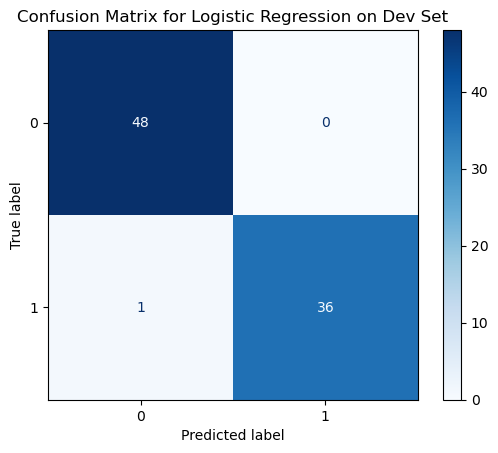

<Figure size 800x600 with 0 Axes>

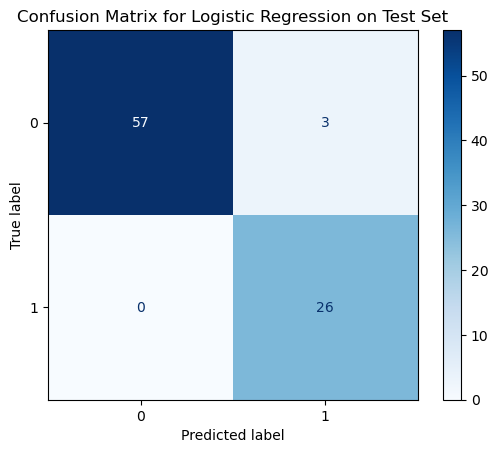

<Figure size 800x600 with 0 Axes>

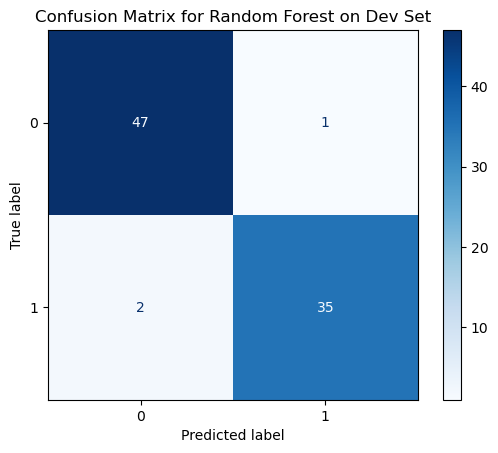

<Figure size 800x600 with 0 Axes>

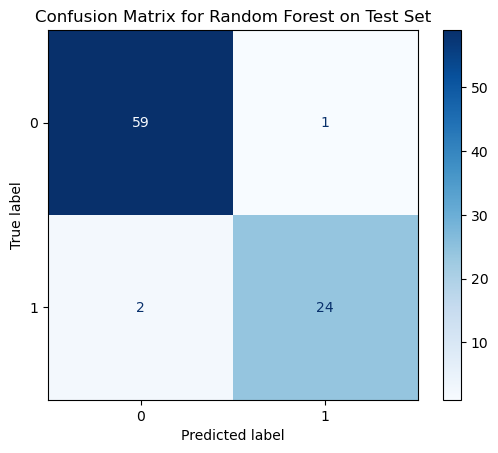

<Figure size 800x600 with 0 Axes>

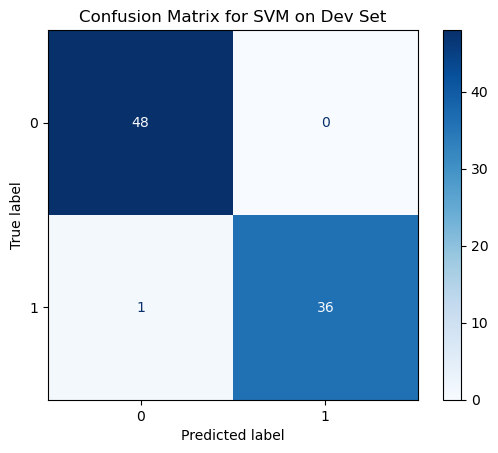

<Figure size 800x600 with 0 Axes>

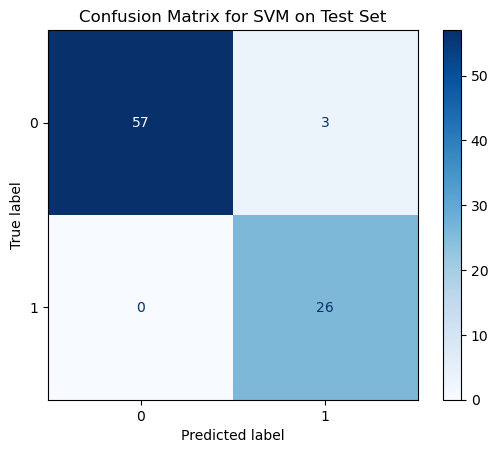

<Figure size 800x600 with 0 Axes>

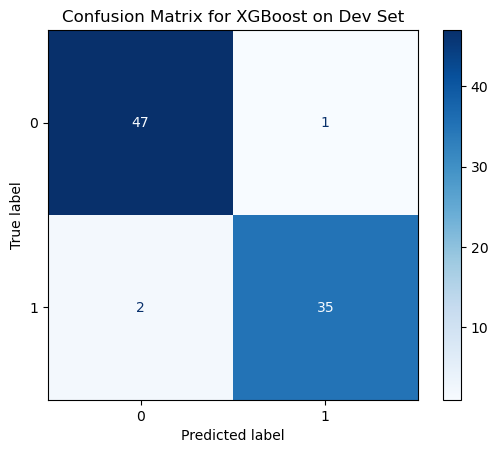

<Figure size 800x600 with 0 Axes>

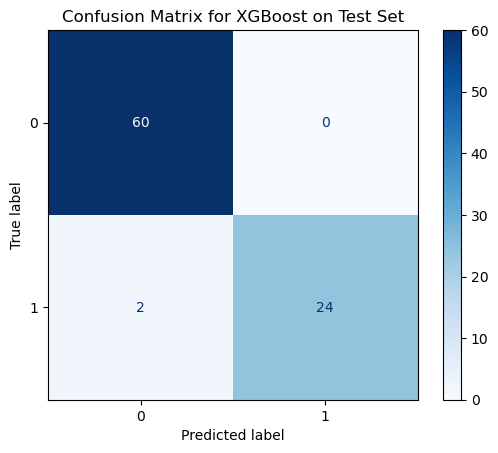

<Figure size 800x600 with 0 Axes>

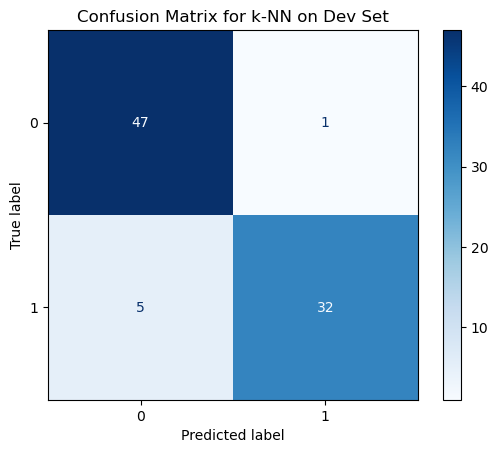

<Figure size 800x600 with 0 Axes>

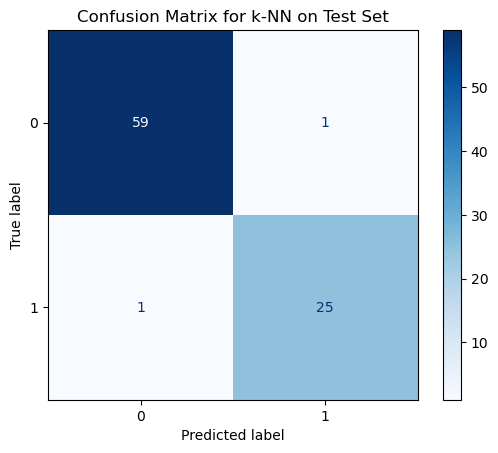

<Figure size 800x600 with 0 Axes>

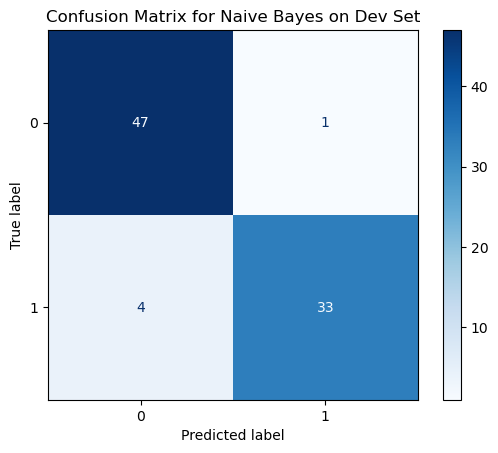

<Figure size 800x600 with 0 Axes>

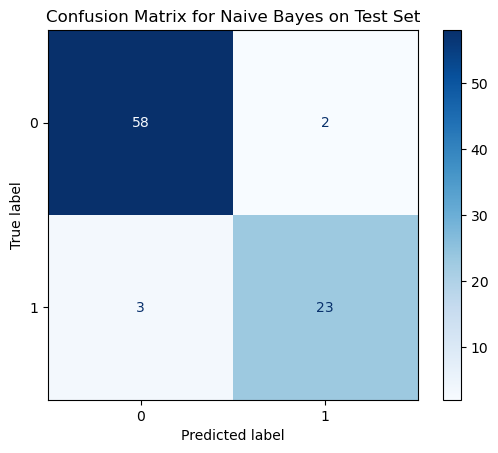

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize dictionaries to hold the confusion matrices for the development and test sets
confusion_matrices_dev = {}
confusion_matrices_test = {}

# Iterate over the best models
for model_name, model in best_models.items():
    # Predictions on development set
    y_dev_pred = model.predict(X_dev)
    
    # Predictions on test set
    y_test_pred = model.predict(X_test)
    
    # Confusion matrices
    confusion_matrices_dev[model_name] = confusion_matrix(y_dev, y_dev_pred)
    confusion_matrices_test[model_name] = confusion_matrix(y_test, y_test_pred)
    
    # Plot the confusion matrix for the development set
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices_dev[model_name], display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name} on Dev Set')
    plt.show()
    
    # Plot the confusion matrix for the test set
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices_test[model_name], display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name} on Test Set')
    plt.show()

In [8]:
# prepare code  measuring performance of the models
from sklearn import metrics

def ScoringMetrics(y, yhat):
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision': metrics.precision_score(y,yhat),
           'Recall': metrics.recall_score(y,yhat),
           'F1': metrics.f1_score(y,yhat),
           'AUC': metrics.roc_auc_score(y,yhat)
          }
    return res

In [9]:
# Initialize dictionaries to store the performance metrics for dev and test sets
performance_metrics_dev = {}
performance_metrics_test = {}

# Iterate over each model in best_models and evaluate its performance
for model_name, model in best_models.items():
    # Predictions on the development set
    y_dev_pred = model.predict(X_dev)
    
    # Predictions on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate performance metrics for the development set
    performance_metrics_dev[model_name] = ScoringMetrics(y_dev, y_dev_pred)
    
    # Calculate performance metrics for the test set
    performance_metrics_test[model_name] = ScoringMetrics(y_test, y_test_pred)

# Convert the performance metrics dictionaries to DataFrames for easier visualization
performance_df_dev = pd.DataFrame(performance_metrics_dev).T
performance_df_test = pd.DataFrame(performance_metrics_test).T

# Print the performance metrics
print("Performance Metrics on Development Set:")
print(performance_df_dev)

print("\nPerformance Metrics on Test Set:")
print(performance_df_test)


Performance Metrics on Development Set:
                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.988235   1.000000  0.972973  0.986301  0.986486
Random Forest        0.964706   0.972222  0.945946  0.958904  0.962556
SVM                  0.988235   1.000000  0.972973  0.986301  0.986486
XGBoost              0.964706   0.972222  0.945946  0.958904  0.962556
k-NN                 0.929412   0.969697  0.864865  0.914286  0.922016
Naive Bayes          0.941176   0.970588  0.891892  0.929577  0.935529

Performance Metrics on Test Set:
                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.965116   0.896552  1.000000  0.945455  0.975000
Random Forest        0.965116   0.960000  0.923077  0.941176  0.953205
SVM                  0.965116   0.896552  1.000000  0.945455  0.975000
XGBoost              0.976744   1.000000  0.923077  0.960000  0.961538
k-NN                 0.976744   0.961538  0.961538  0.961538  0.972436
Nai

<Figure size 800x600 with 0 Axes>

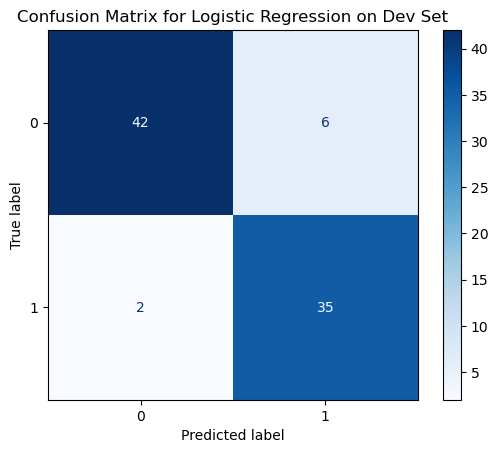

<Figure size 800x600 with 0 Axes>

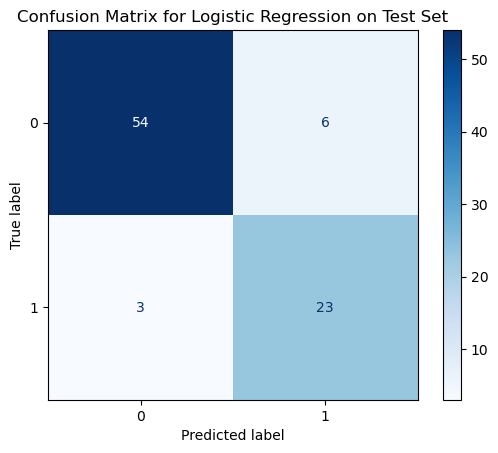

<Figure size 800x600 with 0 Axes>

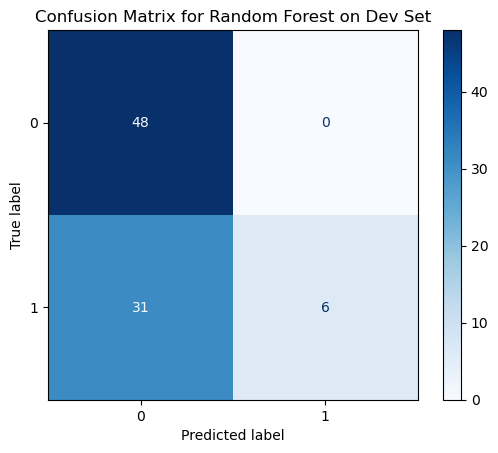

<Figure size 800x600 with 0 Axes>

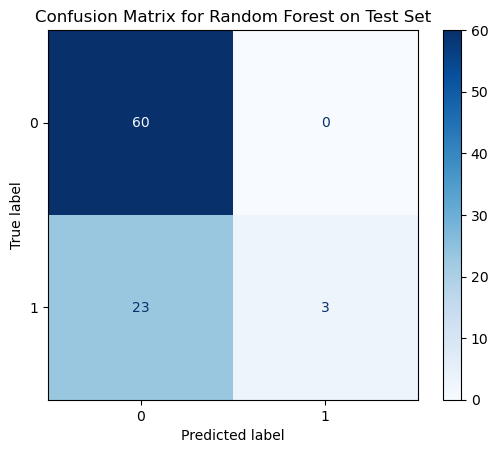

<Figure size 800x600 with 0 Axes>

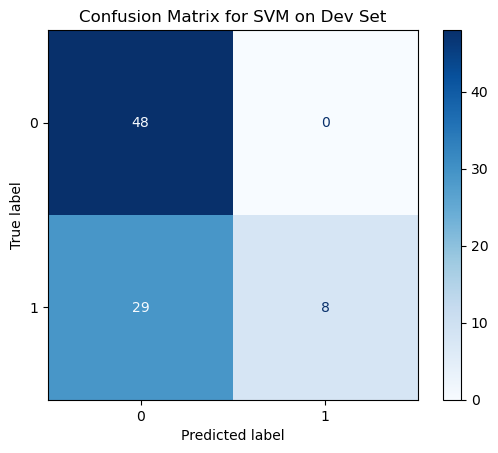

<Figure size 800x600 with 0 Axes>

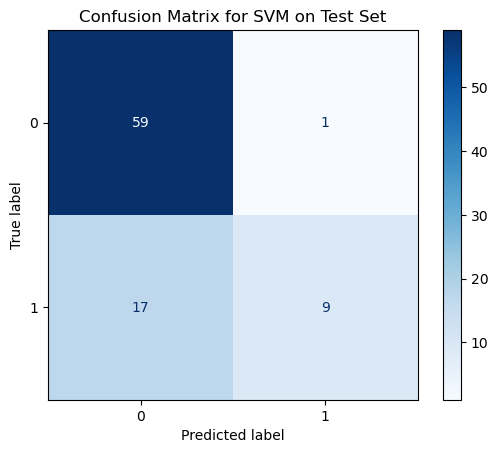

<Figure size 800x600 with 0 Axes>

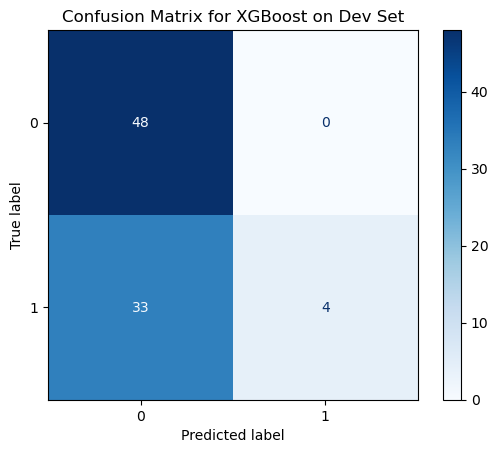

<Figure size 800x600 with 0 Axes>

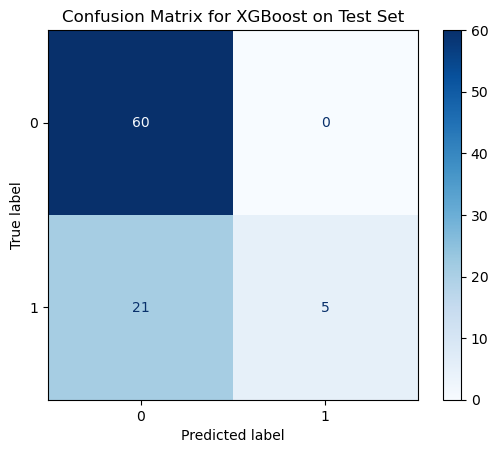

<Figure size 800x600 with 0 Axes>

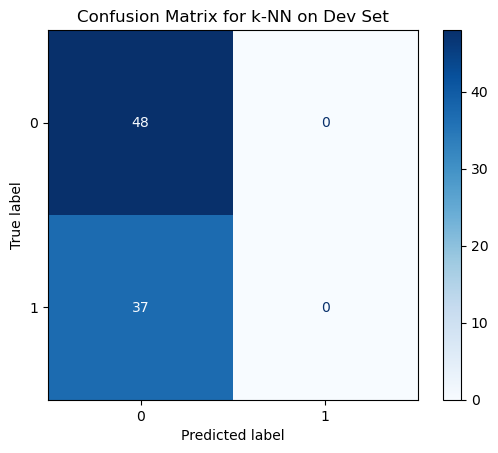

<Figure size 800x600 with 0 Axes>

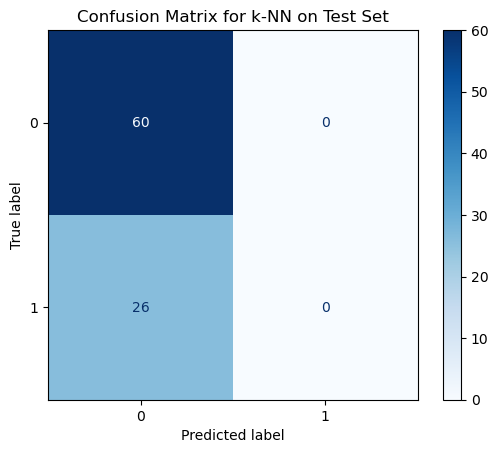

<Figure size 800x600 with 0 Axes>

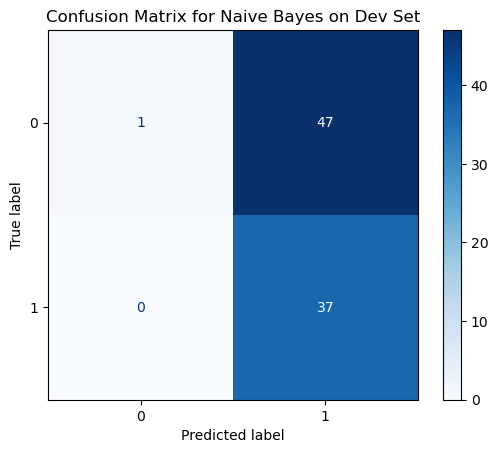

<Figure size 800x600 with 0 Axes>

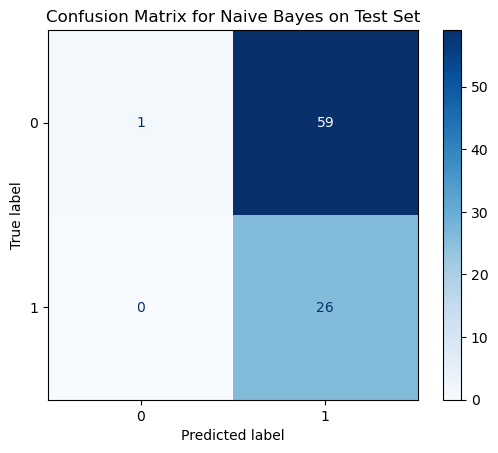

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)
grid_search.fit(X_train_scaled, y_train)

# Initialize dictionaries to store the performance metrics for dev and test sets
performance_metrics_dev = {}
performance_metrics_test = {}

# Iterate over each model in best_models and evaluate its performance
for model_name, model in best_models.items():
    # Predictions on the development set
    y_dev_pred = model.predict(X_dev_scaled)
    
    # Predictions on the test set
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate performance metrics for the development set
    performance_metrics_dev[model_name] = ScoringMetrics(y_dev, y_dev_pred)
    
    # Calculate performance metrics for the test set
    performance_metrics_test[model_name] = ScoringMetrics(y_test, y_test_pred)
    
    # Confusion matrices
    confusion_matrices_dev[model_name] = confusion_matrix(y_dev, y_dev_pred)
    confusion_matrices_test[model_name] = confusion_matrix(y_test, y_test_pred)
    
    # Plot the confusion matrix for the development set
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices_dev[model_name], display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name} on Dev Set')
    plt.show()
    
    # Plot the confusion matrix for the test set
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices_test[model_name], display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name} on Test Set')
    plt.show()

In [21]:
# Convert the performance metrics dictionaries to DataFrames for easier visualization
performance_df_dev = pd.DataFrame(performance_metrics_dev).T
performance_df_test = pd.DataFrame(performance_metrics_test).T

# Print the performance metrics
print("Performance Metrics on Scaled Development Set:")
print(performance_df_dev)

print("\nPerformance Metrics on Scaled Test Set:")
print(performance_df_test)

Performance Metrics on Scaled Development Set:
                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.905882   0.853659  0.945946  0.897436  0.910473
Random Forest        0.635294   1.000000  0.162162  0.279070  0.581081
SVM                  0.658824   1.000000  0.216216  0.355556  0.608108
XGBoost              0.611765   1.000000  0.108108  0.195122  0.554054
k-NN                 0.564706   0.000000  0.000000  0.000000  0.500000
Naive Bayes          0.447059   0.440476  1.000000  0.611570  0.510417

Performance Metrics on Scaled Test Set:
                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.895349   0.793103  0.884615  0.836364  0.892308
Random Forest        0.732558   1.000000  0.115385  0.206897  0.557692
SVM                  0.790698   0.900000  0.346154  0.500000  0.664744
XGBoost              0.755814   1.000000  0.192308  0.322581  0.596154
k-NN                 0.697674   0.000000  0.000000  0.000000

#### Conclusions
- The scaled data produced more reliable results. Before the scale most of the results were close to 100 percent for almost all models, which indicates overfitting, and after the scale the result shows a different distribution of the scores.
- The model that produced the best results is the logistic regression.